Preliminary (done in previous session): import libraries 

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd

# Machine learning in python: scikit-learn

We will demonstrate machine learning methods with scikit-learn (sklearn), one the most used machine learning library in python. If you don't have the library installed, you can refer to the "Instructions to workshop participants" file https://github.com/florisvanvugt/workshop4june2017.

Sklearn API: http://scikit-learn.org/stable/modules/classes.html

Test if you have sklearn installed:

In [11]:
import sklearn

# Workflow

Once you have a clear task in mind (e.g. classification or regression), you can choose the method to use. For instance, a support vector machine:

```
method = svm.SVC()
```

### 1. Load datasets

Load datasets as `X_train` (`y_train` in supervised setting) and `X_test` (`y_test` in supervised setting)

### 3. Train it

Train the method: 

```
method.fit(X_train, y_train)
```

### 4. Test it

Test the method: 

```
pred_X = method.predict(X_test)
```


# Toy example: the Iris dataset

In [17]:
from sklearn import datasets
iris = datasets.load_iris()

TODO: description

In [18]:
features = iris.data
labels = iris.target

In [19]:
print('Number of observations:', len(features), ' | Dimension:', len(features[0]))

Number of observations: 150  | Dimension: 4


In [ ]:
features

In [31]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Visualise the Iris dataset

Feature dimension is 4, it is therefore hard to visualise in a plot. We will extract the two first dimensions and visualise them in a scatter plot.

In [56]:
data_x = features[:,0] # width
data_y = features[:,1] # length

In [58]:
import matplotlib.pyplot as plt

In [59]:
plt.scatter(data_x, data_y, c=labels)

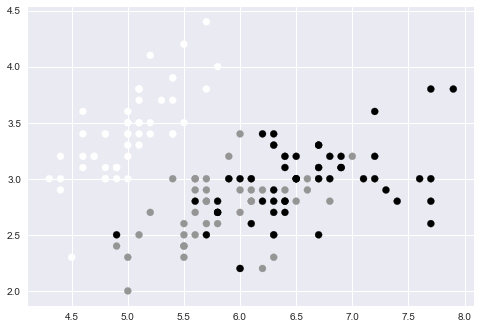

In [60]:
plt.show()

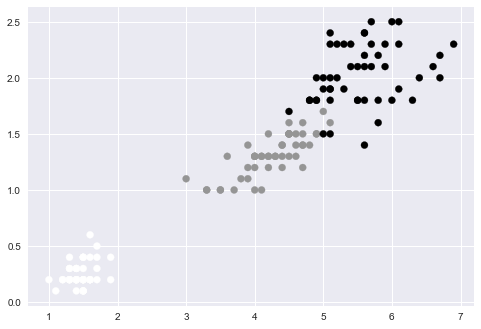

In [61]:
data_x = features[:,2]
data_y = features[:,3]

plt.scatter(data_x, data_y, c=labels)
plt.show()

# Classification

## Example of Support Vector Machine (SVM)

In [76]:
# SVM in sklearn
from sklearn import svm

In [77]:
classifier = svm.SVC()

In [78]:
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
# we use the linear version of support vector machine
classifier = svm.SVC(kernel='linear')
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Training SVM

In [87]:
# train model on the whole dataset given by 'features'
classifier.fit(features, labels);

### Understanding training in SVM

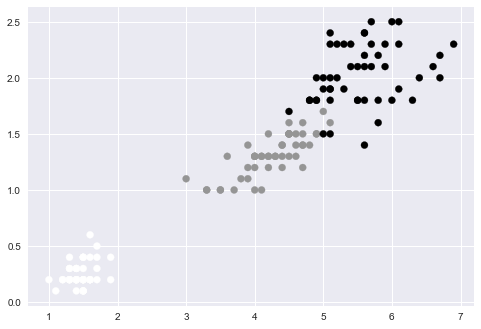

In [85]:
data_x = features[:,2]
data_y = features[:,3]

plt.scatter(data_x, data_y, c=labels)
plt.show()

In [88]:
# train model considering the two last feature dimensions of each observation
classifier.fit(features[:,2:], labels);

#### Plotting decision boundary between Class 1 [white] and Class 2 [grey]

In [89]:
coefs = classifier.coef_[0]

In [90]:
slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[0] / coefs[1]

In [91]:
x = np.linspace(1,4)
y = slope * x - intercept

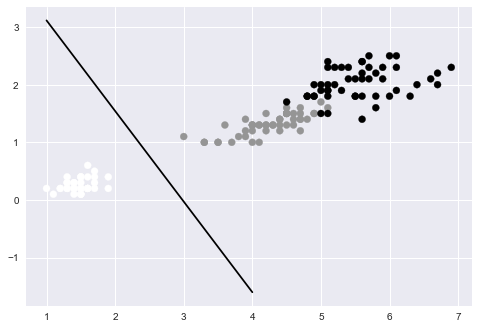

In [92]:
plt.scatter(features[:,2], features[:,3], c=labels)
plt.plot(x, y, '-k')
plt.show()

#### Plotting decision boundary between Class 1 [white] and Class 3 [black]

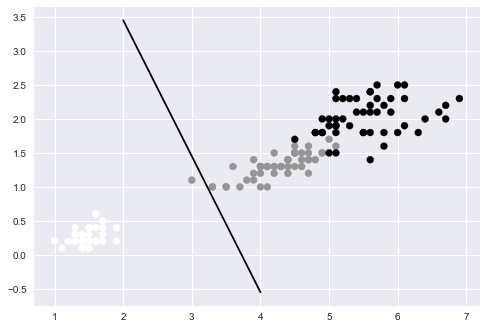

In [100]:
case = 1

coefs = classifier.coef_[case]

slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[case] / coefs[1]

x = np.linspace(2,4)
y = slope * x - intercept

plt.scatter(features[:,2], features[:,3], c=labels)
plt.plot(x, y, '-k')
plt.show()

#### Plotting decision boundary between Class 2 [grey] and Class 3 [black]

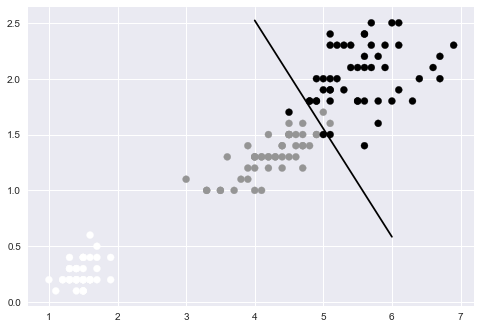

In [97]:
case = 2

coefs = classifier.coef_[case]

slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[case] / coefs[1]

x = np.linspace(4,6)
y = slope * x - intercept

plt.scatter(features[:,2], features[:,3], c=labels)
plt.plot(x, y, '-k')
plt.show()

## Testing SVM

In the previous section, we trained SVM with **EVERY** observation in our dataset:

In [102]:
classifier.fit(features[:,2:], labels);

**QUESTION**: how can we test the accuracy of the method and the training?

**ANSWER**: we split the dataset into a *training dataset* and a *testing dataset*

In [119]:
# For convenience we convert python lists in numpy array
X = np.array( features[:,:] )
y = np.array( labels )

In [120]:
# This allows us to access elements in each matrix through list of indexes
indexes = [1,3,7]
X[indexes]

array([[ 4.9,  3. ,  1.4,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.4,  1.5,  0.2]])

### Splitting datasets in scikit-learn

In [121]:
from sklearn.model_selection import StratifiedKFold

In [163]:
splitter = StratifiedKFold(n_splits=10)

In [164]:
print(splitter)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [165]:
splitter.split(X,y)

<generator object _BaseKFold.split at 0x10b3110f8>

In [166]:
for train_index, test_index in splitter.split(X,y):
    print("training indexes:", train_index)
    print("testing indexes:", test_index)

training indexes: [  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149]
testing indexes: [  0   1   2   3   4  50  51  52  53  54 100 101 102 103 104]
training indexes: [  0   1   2   3   4  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92

In [167]:
for train_index, test_index in splitter.split(X,y):
    # select training and testing datasets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape, X_test.shape)

(135, 4) (15, 4)
(135, 4) (15, 4)
(135, 4) (15, 4)
(135, 4) (15, 4)
(135, 4) (15, 4)
(135, 4) (15, 4)
(135, 4) (15, 4)
(135, 4) (15, 4)
(135, 4) (15, 4)
(135, 4) (15, 4)


### Testing on splitting datasets

In [168]:
splitter = StratifiedKFold(n_splits=20)

all_scores = []

for train_index, test_index in splitter.split(X,y):

    # select training and testing datasets
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]   
    
    # declare classifier
    classifier = svm.SVC(kernel='linear')
    classifier.fit(X_train[:,:2],y_train)   
    
    # compute score on testing dataset and store it
    score = classifier.score(X_test[:,:2],y_test)
    all_scores.append(score)  
    
    # print score
    print('score: %.2f%%'%(score*100))

score: 55.56%
score: 88.89%
score: 66.67%
score: 88.89%
score: 77.78%
score: 88.89%
score: 88.89%
score: 88.89%
score: 55.56%
score: 77.78%
score: 100.00%
score: 83.33%
score: 83.33%
score: 83.33%
score: 83.33%
score: 83.33%
score: 83.33%
score: 100.00%
score: 83.33%
score: 83.33%


In [169]:
print(np.mean(all_scores)*100)

82.2222222222
